In [149]:
import pandas as pd


# Tratamento dos dados


In [150]:
import os

file_path = r'.\dataset _original _rodada _1 _(vinho _branco) _FieldSpec.xlsx'
#file_path = r'C:\Users\lenau\Documents\GitHub\field_spec_data_tests\dataset_original_rodada_1_(vinho_branco)_FieldSpec.xlsx'

#importando o arquivo e guardando na variável file_path

fs_df = pd.read_excel(file_path)
#o pandas como pd lê o arquivo em file_path e guarda na variavel fs_df

#fs_df

In [151]:
fs_df.tail()

,Wavelength,Date,Tank,TA,AV,AT,pH,MV,AR,350,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
37,amostra_00038.asd.txt,2022-11-09,110,11.5,0.27,5.10,3.8,995,1.8,1.503835,...,2.656636,2.550109,2.501081,2.471406,2.529202,2.619732,2.639313,2.598884,2.575628,2.642086
38,amostra_00039.asd.txt,2022-11-09,110,11.5,0.27,5.10,3.8,995,1.8,1.664785,...,2.797181,2.758138,3.052151,3.213511,3.071573,3.178512,3.150150,3.103570,3.097533,3.154010
39,amostra_00040.asd.txt,2022-11-09,110,11.5,0.29,5.17,3.8,995,1.8,1.863774,...,3.127336,2.887030,2.822618,2.870859,2.779617,2.837596,2.990740,2.869202,2.732040,2.635091
40,amostra_00041.asd.txt,2022-11-09,110,11.5,0.29,5.17,3.8,995,1.8,1.670042,...,2.718212,2.633415,2.549066,2.544755,2.590426,2.767958,3.169085,3.571220,3.605718,4.104746
41,amostra_00042.asd.txt,2022-11-09,110,11.5,0.27,5.10,3.8,995,1.8,1.695179,...,2.745712,2.794190,2.618852,2.728730,2.796776,2.743646,3.205304,3.058834,2.688029,2.637008


In [152]:
params = ['TA', 'AV', 'AT', 'pH', 'MV', 'AR']
#salva as colunas e as informações delas numa variavel params
start_var = 9
#variavel de contagem para uso posterior

In [153]:
index = fs_df.columns.to_list()[0:4]
#index recebe da primeira a terceira coluna do dataset

In [154]:
fs_params = fs_df[params].dropna()
#ele seleciona as colunas que guardei anteriormente e remove qualquer valor que é NaN e guarda nessa variavel
fs_vars = fs_df.iloc[:, start_var:fs_df.shape[1]].columns.to_list()
#da nona coluna em diante ele pega e guarda nessa variavel fs_vars

In [155]:
fs_pv = index + params + fs_vars 
fs_df_final = fs_df[fs_pv].dropna()
#estou remontando o data set com os index, os parametros e as variaveis novamente, mas garantindo os dados limpos


In [156]:
fs_df_final.head()
#conferindo se esta ok

,Wavelength,Date,Tank,TA,TA,AV,AT,pH,MV,AR,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,amostra_00001.asd.txt,2022-11-02,107,10.43,10.43,0.10,4.20,3.9,1077,182.46,...,3.480935,3.224706,3.091417,2.834518,2.852583,3.005980,2.809721,3.016107,3.529182,2.870795
1,amostra_00002.asd.txt,2022-11-02,107,10.43,10.43,0.09,4.42,3.8,1077,182.46,...,2.859877,2.830242,2.767661,2.784210,2.892849,3.023952,3.379469,5.663446,3.147727,2.639841
2,amostra_00003.asd.txt,2022-11-02,107,10.43,10.43,0.10,4.35,3.8,1077,182.46,...,2.855198,2.637099,2.585754,2.539939,2.538623,2.640047,2.587395,2.542342,2.561586,2.546457
3,amostra_00004.asd.txt,2022-11-02,107,10.43,10.43,0.11,4.20,3.8,1077,182.46,...,2.728690,2.741771,2.985479,2.805321,2.720138,2.795015,2.863823,3.246327,5.823909,5.823909
4,amostra_00005.asd.txt,2022-11-02,107,10.43,10.43,0.10,4.27,3.8,1077,182.46,...,2.912330,3.170591,3.521192,3.608611,5.823909,5.823909,4.138614,3.565699,3.083535,2.765076


In [157]:
#file_path = r'.\dataset _original _rodada _1 _(vinho _branco) _FieldSpec.xlsx'
#fs_df = pd.read_excel(file_path)
#fs_df.head()

In [158]:
#fs_df_final.head()

In [159]:
import numpy as np

fs_df_final = fs_df.drop(['Wavelength', 'Tank', 'TA', 'AV', 'AT', 'pH', 'MV', 'AR', 'Date'], axis=1)
#vamos atualizar essa varivel com o que esta em fs_df porém sem as colunas acima

x = fs_df_final 
#dados do espectro guardados em x

wl = np.arange(350,2501,1) 
#comprimento de onda arranjados de 350 a 2500, iterando de 1 a 1 e guardados dento de wl

x.head()

,350,351,352,353,354,355,356,357,358,359,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1.631373,1.583009,1.688945,1.880755,1.719132,1.749026,1.787512,1.707210,1.788553,1.709570,...,3.480935,3.224706,3.091417,2.834518,2.852583,3.005980,2.809721,3.016107,3.529182,2.870795
1,1.569768,1.619258,1.908904,2.260184,1.610376,1.713062,1.904372,1.688036,1.801348,1.701634,...,2.859877,2.830242,2.767661,2.784210,2.892849,3.023952,3.379469,5.663446,3.147727,2.639841
2,1.649704,1.591111,1.595969,1.665178,1.592532,1.694299,1.769089,1.650012,1.710203,1.672124,...,2.855198,2.637099,2.585754,2.539939,2.538623,2.640047,2.587395,2.542342,2.561586,2.546457
3,1.752614,1.671143,1.786201,2.081373,1.800722,1.834436,1.819969,1.619182,1.589644,1.612484,...,2.728690,2.741771,2.985479,2.805321,2.720138,2.795015,2.863823,3.246327,5.823909,5.823909
4,1.529986,1.671512,1.957634,2.084863,1.745174,1.631412,1.646875,1.721262,1.674133,1.622133,...,2.912330,3.170591,3.521192,3.608611,5.823909,5.823909,4.138614,3.565699,3.083535,2.765076


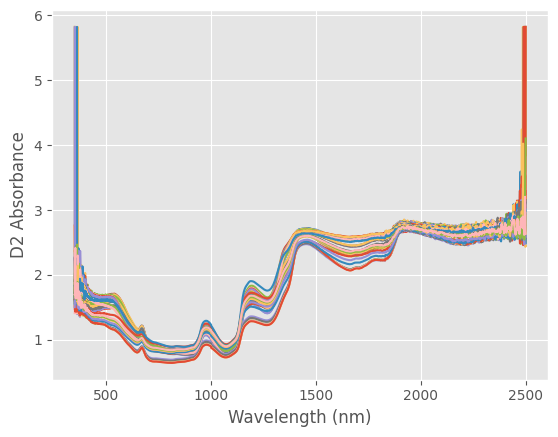

In [160]:
import matplotlib.pyplot as plt

# Define o estilo do gráfico como 'ggplot' dentro do contexto do bloco de código
# Isso significa que apenas as instruções de plotagem dentro deste bloco utilizarão o estilo 'ggplot'
# O estilo 'ggplot' é uma tentativa de replicar o estilo visual do pacote ggplot2 do R
with plt.style.context(('ggplot')): 
    # Plota os dados contidos em X2 transpostos (T) em relação aos valores de comprimento de onda armazenados em wl
    plt.plot(wl, x.T)
    
    # Define o rótulo do eixo x como 'Wavelength (nm)'
    plt.xlabel('Wavelength (nm)')
    
    # Define o rótulo do eixo y como 'D2 Absorbance'
    plt.ylabel('D2 Absorbance')
    
    # Exibe o gráfico
    plt.show()

# Pré-processamento


In [161]:

import matplotlib.pyplot as plt


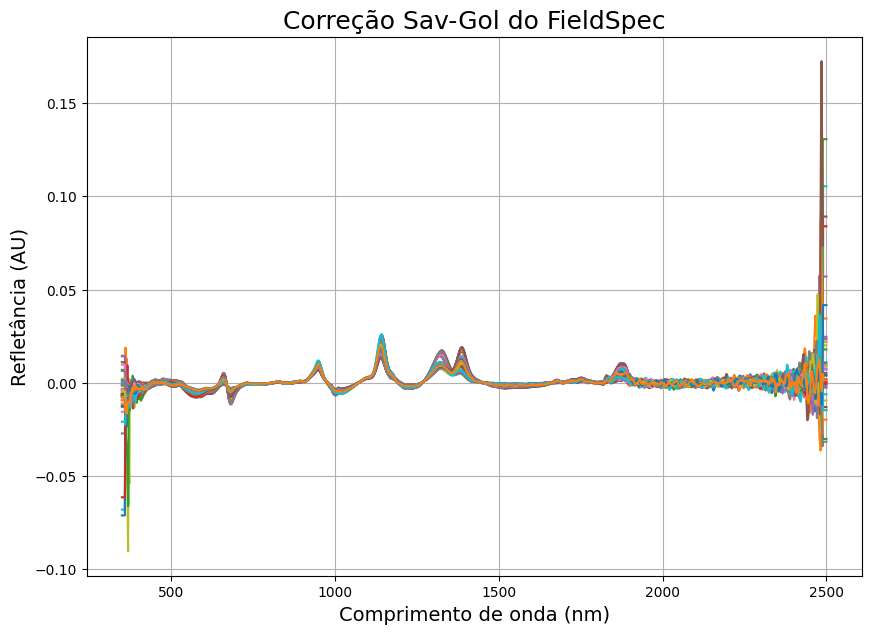

In [162]:
# Importa a função savgol_filter do módulo scipy.signal
from scipy.signal import savgol_filter

# Aplica a função savgol_filter aos dados x
# para calcular a primeira derivada dos dados
# utilizando uma janela de tamanho 20 e um polinômio de ordem 1
X2 = savgol_filter(x, 20, polyorder=1, deriv=1)

# Importa a biblioteca matplotlib.pyplot para plotagem
import matplotlib.pyplot as plt
    
# Define o tamanho da figura como 12x9 polegadas
plt.figure(figsize=(10,7))

# Plota os dados contidos no DataFrame df em relação aos valores do eixo x x_axis_fs
plt.plot(wl, X2.T)

# Define o rótulo do eixo x como "Comprimento de onda (nm)" com tamanho de fonte 14
plt.xlabel("Comprimento de onda (nm)", size=14)

# Define o rótulo do eixo y como "Refletância (AU)" com tamanho de fonte 14
plt.ylabel("Refletância (AU)", size=14)

# Define o título do gráfico como "Espectrometria do FieldSpec" com tamanho de fonte 18
plt.title("Correção Sav-Gol do FieldSpec", size=18)

# Ativa a grade no gráfico
plt.grid("on")

# Exibe o gráfico
plt.show()


In [163]:
# Criando um DataFrame a partir dos dados contidos em X2
df = pd.DataFrame(X2)

# Nome do arquivo Excel a ser exportado
filename = 'dataset_derivada_ordem_1.xlsx'

# Exportando o DataFrame para um arquivo Excel, excluindo o índice das linhas
df.to_excel(filename, index=False)

# Imprimindo uma mensagem indicando que o conjunto de dados foi exportado com sucesso para o Excel
print("Dataset exported successfully to Excel.")


Dataset exported successfully to Excel.


In [164]:
# Importando as funções MSC do módulo spectral_correction dentro do pacote pyspectra.transformers
from pyspectra.transformers.spectral_correction import msc

fs = fs_vars

# Instanciando o objeto MSC_fs para aplicar a correção MSC
MSC_fs = msc()

# Aplicando a transformação de ajuste e transformação MSC aos dados 'df' e armazenando o resultado em 'data_msc_fs'
data_msc_fs = MSC_fs.fit_transform(fs_df_final)


In [165]:
# Obtém os rótulos das colunas do DataFrame data_msc_fs e converte para um array NumPy
x_axis_fs = data_msc_fs.columns.to_numpy().astype('int64')

# Converte os valores do array para o tipo int64


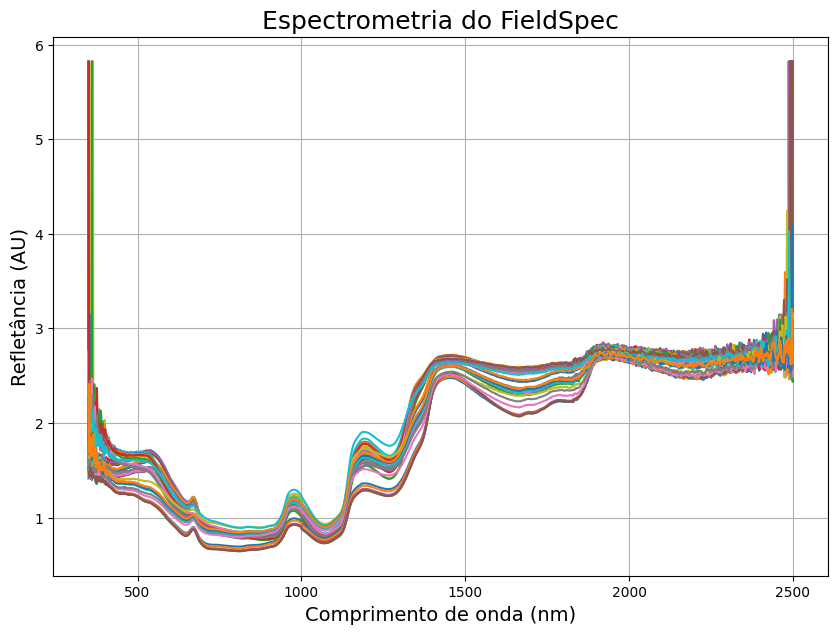

In [166]:
# Define o tamanho da figura como 12x9 polegadas
plt.figure(figsize=(10,7))

# Plota os dados contidos no DataFrame df em relação aos valores do eixo x x_axis_fs
plt.plot(x_axis_fs, fs_df_final.T)

# Define o rótulo do eixo x como "Comprimento de onda (nm)" com tamanho de fonte 14
plt.xlabel("Comprimento de onda (nm)", size=14)

# Define o rótulo do eixo y como "Refletância (AU)" com tamanho de fonte 14
plt.ylabel("Refletância (AU)", size=14)

# Define o título do gráfico como "Espectrometria do FieldSpec" com tamanho de fonte 18
plt.title("Espectrometria do FieldSpec", size=18)

# Ativa a grade no gráfico
plt.grid("on")

# Exibe o gráfico
plt.show()


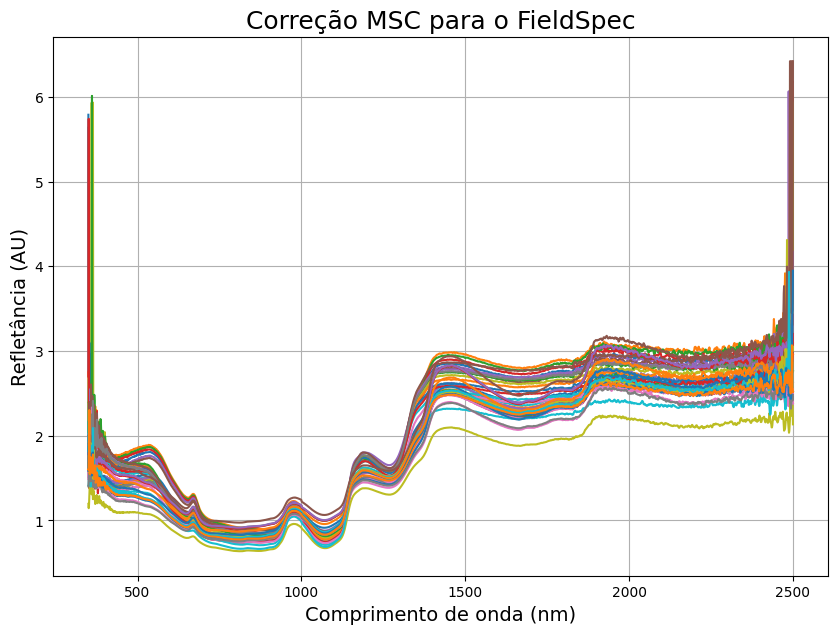

In [167]:
# Define o tamanho da figura como 12x9 polegadas
plt.figure(figsize=(10, 7))

# Plota os dados corrigidos MSC contidos no DataFrame data_msc_fs 
# em relação aos valores do eixo x x_axis_fs
plt.plot(x_axis_fs, data_msc_fs.T)

# Define o rótulo do eixo x como "Comprimento de onda (nm)" com tamanho de fonte 14
plt.xlabel("Comprimento de onda (nm)", size=14)

# Define o rótulo do eixo y como "Refletância (AU)" com tamanho de fonte 14
plt.ylabel("Refletância (AU)", size=14)

# Define o título do gráfico como "Correção MSC para o FieldSpec" com tamanho de fonte 18
plt.title("Correção MSC para o FieldSpec", size=18)

# Ativa a grade no gráfico
plt.grid("on")

# Exibe o gráfico
plt.show()


In [168]:
# Defina o nome do arquivo onde deseja salvar os dados corrigidos
filename = "dataset_msc.xlsx"

# Salve os dados corrigidos em um novo arquivo Excel
data_msc_fs.to_excel(filename, index=False)

# Exiba uma mensagem indicando que o arquivo foi salvo com sucesso
print(f"Dados corrigidos salvos com sucesso em {filename}")

Dados corrigidos salvos com sucesso em dataset_msc.xlsx


In [169]:
# Importa a função snv() do módulo spectral_correction dentro do pacote pyspectra.transformers
from pyspectra.transformers.spectral_correction import snv

# Instancia o objeto SNV_fs para aplicar a correção SNV
SNV_fs = snv()

# Aplica a transformação de ajuste e transformação SNV aos dados 'data_msc_fs' e armazena o resultado em 'data_snv_fs'
data_snv_fs = SNV_fs.fit_transform(fs_df_final)


In [170]:
# Defina o nome do arquivo onde deseja salvar os dados corrigidos
filename = "dataset_snv.xlsx"

# Salve os dados corrigidos em um novo arquivo Excel
data_snv_fs.to_excel(filename, index=False)

# Exiba uma mensagem indicando que o arquivo foi salvo com sucesso
print(f"Dados corrigidos salvos com sucesso em {filename}")

Dados corrigidos salvos com sucesso em dataset_snv.xlsx


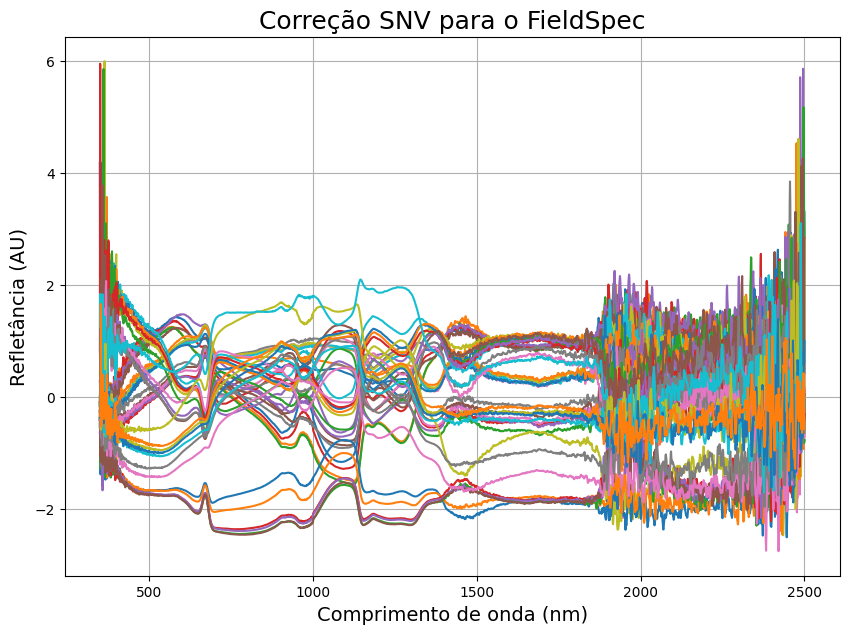

In [171]:
# Cria uma figura para o gráfico com tamanho 12x9 polegadas
plt.figure(figsize=(10, 7))

# Plota os dados corrigidos SNV em relação ao eixo x_axis_fs
plt.plot(x_axis_fs, data_snv_fs.T)

# Define o rótulo do eixo x como "Comprimento de onda (nm)" e o tamanho da fonte como 14
plt.xlabel("Comprimento de onda (nm)", size=14)

# Define o rótulo do eixo y como "Refletância (AU)" e o tamanho da fonte como 14
plt.ylabel("Refletância (AU)", size=14)

# Define o título do gráfico como "Correção SNV para o FieldSpec" e o tamanho da fonte como 18
plt.title("Correção SNV para o FieldSpec", size=18)

# Adiciona uma grade ao gráfico
plt.grid("on")

# Exibe o gráfico
plt.show()


# Divisão de dados e teste de modelos

In [172]:
# Lista de conjuntos de dados espectrais (X) e atributos de qualidade (Y) para cada dispositivo
Y = fs_df[['TA', 'AV', 'AT', 'pH', 'MV', 'AR']].dropna()
X = fs_df_final

In [173]:
from sklearn.model_selection import GridSearchCV
from sklearn.cross_decomposition import PLSRegression
import numpy as np

parameters_gs = {'n_components': np.arange(1, 20, 1)}
pls = GridSearchCV(PLSRegression(), parameters_gs, scoring='neg_mean_squared_error', verbose=0, cv=10)
pls.fit(X, Y)
print(pls.best_estimator_)


PLSRegression(n_components=13)


In [174]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings('ignore')  # Ignora os avisos durante a execução


# Lista de métodos de pré-processamento a serem aplicados
pre_p = ["MSC", "RAW", "SNV", "Savitzky-Golay"]

# DataFrame para armazenar os resultados
results = pd.DataFrame(columns=['Dispositivo', 'Parâmetro', 'Modelo', 'Pré-processamento', 'R² Calibração', 'R² Validação', 'RMSE Calibração', 'RMSE Validação'])

columns_r = results.columns.to_list()

# Lista de dispositivos
device = ["FieldSpec"]

# Índices para os parâmetros de qualidade
index_pr = [0, 1, 2, 3, 4, 5]

# Nomes dos parâmetros de qualidade
index_pr_name = ["TA", "AV", "AT", "pH", "MV", "AR"]

# Contadores
t = 0
counter = 0

# Loop sobre os métodos de pré-processamento
for pre in pre_p:
        # Aplicação do método de pré-processamento atual
        if pre == "MSC":
            # Aplica o MSC nos dados
            x_p = data_msc_fs
            
            # Divide os dados em conjunto de treinamento e teste
            x_tr, x_te, y_tr, y_te = train_test_split(x_p, Y, test_size=0.3, random_state=0)
            
            
            # Modelagem com PLSR
            pls = PLSRegression(n_components=13)
            pls.fit(x_tr, y_tr)
            y_pred = pls.predict(x_te)
            y_cal = pls.predict(x_tr)
            # Avaliação do modelo
            # Para cada parâmetro de qualidade
            pls_results = []
            for j in index_pr:
                r2_cal = r2_score(y_tr.iloc[:, j], y_cal[:, j])
                r2_pred = r2_score(y_te.iloc[:, j], y_pred[:, j])
                rmse_cal = np.sqrt(mean_squared_error(y_tr.iloc[:, j], y_cal[:, j]))
                rmse_pred = np.sqrt(mean_squared_error(y_te.iloc[:, j], y_pred[:, j]))
                
                result_pls = [device[t], index_pr_name[j], "PLS", pre, f"{r2_cal:.4f}", f"{r2_pred:.4f}", f"{rmse_cal:.4f}", f"{rmse_pred:.4f}"]
                
                # Adiciona os resultados à lista temporária
                pls_results.append(result_pls)

            # Converte a lista temporária em um DataFrame
            pls_df = pd.DataFrame(pls_results, columns=columns_r)

            # Concatena o DataFrame temporário aos resultados
            results = pd.concat([results, pls_df], ignore_index=True)
            
            counter += 1
            print(1)
            
            # Outros modelos e avaliações
            # (mesma lógica que PLSR)
            
            rf = RandomForestRegressor()
            rf.fit(x_tr, y_tr)
            y_pred = rf.predict(x_te)
            y_cal = rf.predict(x_tr)

            # Lista temporária para armazenar os resultados de RandomForestRegressor
            rf_results = []

            for j in index_pr:
                r2_cal = r2_score(y_tr.iloc[:, j], y_cal[:, j])
                r2_pred = r2_score(y_te.iloc[:, j], y_pred[:, j])
                rmse_cal = np.sqrt(mean_squared_error(y_tr.iloc[:, j], y_cal[:, j]))
                rmse_pred = np.sqrt(mean_squared_error(y_te.iloc[:, j], y_pred[:, j]))

                # Cria uma lista com os resultados
                result_rf = [device[t], index_pr_name[j], "RF", pre, f"{r2_cal:.4f}", f"{r2_pred:.4f}", f"{rmse_cal:.4f}", f"{rmse_pred:.4f}"]
                
                # Adiciona os resultados à lista temporária
                rf_results.append(result_rf)

            # Converte a lista temporária em um DataFrame
            rf_df = pd.DataFrame(rf_results, columns=columns_r)

            # Concatena o DataFrame temporário aos resultados
            results = pd.concat([results, rf_df], ignore_index=True)

            mlpr = MLPRegressor(max_iter=400, solver="adam", learning_rate_init=0.01)
            mlpr.fit(x_tr, y_tr)
            y_pred = mlpr.predict(x_te)
            y_cal = mlpr.predict(x_tr)

            # Lista temporária para armazenar os resultados de MLPRegressor
            mlpr_results = []
            print(2)

            for j in index_pr:
                r2_cal = r2_score(y_tr.iloc[:, j], y_cal[:, j])
                r2_pred = r2_score(y_te.iloc[:, j], y_pred[:, j])
                rmse_cal = np.sqrt(mean_squared_error(y_tr.iloc[:, j], y_cal[:, j]))
                rmse_pred = np.sqrt(mean_squared_error(y_te.iloc[:, j], y_pred[:, j]))

                # Cria uma lista com os resultados
                result_mlpr = [device[t], index_pr_name[j], "MLPR", pre, f"{r2_cal:.4f}", f"{r2_pred:.4f}", f"{rmse_cal:.4f}", f"{rmse_pred:.4f}"]
                
                # Adiciona os resultados à lista temporária
                mlpr_results.append(result_mlpr)

            # Converte a lista temporária em um DataFrame
            mlpr_df = pd.DataFrame(mlpr_results, columns=columns_r)

            # Concatena o DataFrame temporário aos resultados
            results = pd.concat([results, mlpr_df], ignore_index=True)
            
            print(3)

            
        elif pre == "RAW":
            x_tr, x_te, y_tr, y_te = train_test_split(X, Y, test_size=0.3, random_state = 0)

            pls = PLSRegression(n_components=13)
            pls.fit(x_tr, y_tr)
            y_pred = pls.predict(x_te)
            y_cal = pls.predict(x_tr)

            pls_results = []
            for j in index_pr:
                r2_cal = r2_score(y_tr.iloc[:, j], y_cal[:, j])
                r2_pred = r2_score(y_te.iloc[:, j], y_pred[:, j])
                rmse_cal = np.sqrt(mean_squared_error(y_tr.iloc[:, j], y_cal[:, j]))
                rmse_pred = np.sqrt(mean_squared_error(y_te.iloc[:, j], y_pred[:, j]))

                result_pls = [device[t], index_pr_name[j], "PLS", pre, f"{r2_cal:.4f}", f"{r2_pred:.4f}", f"{rmse_cal:.4f}", f"{rmse_pred:.4f}"]
                
                # Adiciona os resultados à lista temporária
                pls_results.append(result_pls)

            # Converte a lista temporária em um DataFrame
            pls_df = pd.DataFrame(pls_results, columns=columns_r)

            # Concatena o DataFrame temporário aos resultados
            results = pd.concat([results, pls_df], ignore_index=True)

            rf = RandomForestRegressor()
            rf.fit(x_tr, y_tr)
            y_pred = rf.predict(x_te)
            y_cal = rf.predict(x_tr)
            
            print(4)

            rf_results = []
            for j in index_pr:
                r2_cal = r2_score(y_tr.iloc[:, j], y_cal[:, j])
                r2_pred = r2_score(y_te.iloc[:, j], y_pred[:, j])
                rmse_cal = np.sqrt(mean_squared_error(y_tr.iloc[:, j], y_cal[:, j]))
                rmse_pred = np.sqrt(mean_squared_error(y_te.iloc[:, j], y_pred[:, j]))

                # Cria uma lista com os resultados
                result_rf = [device[t], index_pr_name[j], "RF", pre, f"{r2_cal:.4f}", f"{r2_pred:.4f}", f"{rmse_cal:.4f}", f"{rmse_pred:.4f}"]
                
                # Adiciona os resultados à lista temporária
                rf_results.append(result_rf)

            # Converte a lista temporária em um DataFrame
            rf_df = pd.DataFrame(rf_results, columns=columns_r)

            # Concatena o DataFrame temporário aos resultados
            results = pd.concat([results, rf_df], ignore_index=True)
            
            print(5)
            
            mlpr_results = []

            mlpr = MLPRegressor(max_iter=400, solver= "adam", learning_rate_init= 0.01)
            mlpr.fit(x_tr, y_tr)
            y_pred = mlpr.predict(x_te)
            y_cal = mlpr.predict(x_tr)

            for j in index_pr:
                r2_cal = r2_score(y_tr.iloc[:, j], y_cal[:, j])
                r2_pred = r2_score(y_te.iloc[:, j], y_pred[:, j])
                rmse_cal = np.sqrt(mean_squared_error(y_tr.iloc[:, j], y_cal[:, j]))
                rmse_pred = np.sqrt(mean_squared_error(y_te.iloc[:, j], y_pred[:, j]))

                # Cria uma lista com os resultados
                result_mlpr = [device[t], index_pr_name[j], "MLPR", pre, f"{r2_cal:.4f}", f"{r2_pred:.4f}", f"{rmse_cal:.4f}", f"{rmse_pred:.4f}"]
                
                # Adiciona os resultados à lista temporária
                mlpr_results.append(result_mlpr)

            # Converte a lista temporária em um DataFrame
            mlpr_df = pd.DataFrame(mlpr_results, columns=columns_r)

            # Concatena o DataFrame temporário aos resultados
            results = pd.concat([results, mlpr_df], ignore_index=True)
            
            print(6)
            
        elif pre == "SNV":
            x_p = data_snv_fs

            x_tr, x_te, y_tr, y_te = train_test_split(x_p, Y, test_size=0.3, random_state = 0)

            pls = PLSRegression(n_components=13)
            pls.fit(x_tr, y_tr)
            y_pred = pls.predict(x_te)
            y_cal = pls.predict(x_tr)
            
            pls_results = []

            for j in index_pr:
                r2_cal = r2_score(y_tr.iloc[:, j], y_cal[:, j])
                r2_pred = r2_score(y_te.iloc[:, j], y_pred[:, j])
                rmse_cal = np.sqrt(mean_squared_error(y_tr.iloc[:, j], y_cal[:, j]))
                rmse_pred = np.sqrt(mean_squared_error(y_te.iloc[:, j], y_pred[:, j]))

                result_pls = [device[t], index_pr_name[j], "PLS", pre, f"{r2_cal:.4f}", f"{r2_pred:.4f}", f"{rmse_cal:.4f}", f"{rmse_pred:.4f}"]
                
                # Adiciona os resultados à lista temporária
                pls_results.append(result_pls)

            # Converte a lista temporária em um DataFrame
            pls_df = pd.DataFrame(pls_results, columns=columns_r)

            # Concatena o DataFrame temporário aos resultados
            results = pd.concat([results, pls_df], ignore_index=True)

            
            print(7)
            rf = RandomForestRegressor()
            rf.fit(x_tr, y_tr)
            y_pred = rf.predict(x_te)
            y_cal = rf.predict(x_tr)

            rf_results = []
            for j in index_pr:
                r2_cal = r2_score(y_tr.iloc[:, j], y_cal[:, j])
                r2_pred = r2_score(y_te.iloc[:, j], y_pred[:, j])
                rmse_cal = np.sqrt(mean_squared_error(y_tr.iloc[:, j], y_cal[:, j]))
                rmse_pred = np.sqrt(mean_squared_error(y_te.iloc[:, j], y_pred[:, j]))

                # Cria uma lista com os resultados
                result_rf = [device[t], index_pr_name[j], "RF", pre, f"{r2_cal:.4f}", f"{r2_pred:.4f}", f"{rmse_cal:.4f}", f"{rmse_pred:.4f}"]
                
                # Adiciona os resultados à lista temporária
                rf_results.append(result_rf)

            # Converte a lista temporária em um DataFrame
            rf_df = pd.DataFrame(rf_results, columns=columns_r)

            # Concatena o DataFrame temporário aos resultados
            results = pd.concat([results, rf_df], ignore_index=True)

            print(8)
            mlpr = MLPRegressor(max_iter=400, solver= "adam", learning_rate_init= 0.01)
            mlpr.fit(x_tr, y_tr)
            y_pred = mlpr.predict(x_te)
            y_cal = mlpr.predict(x_tr)
            
            mlpr_results = []

            for j in index_pr:
                r2_cal = r2_score(y_tr.iloc[:, j], y_cal[:, j])
                r2_pred = r2_score(y_te.iloc[:, j], y_pred[:, j])
                rmse_cal = np.sqrt(mean_squared_error(y_tr.iloc[:, j], y_cal[:, j]))
                rmse_pred = np.sqrt(mean_squared_error(y_te.iloc[:, j], y_pred[:, j]))

                # Cria uma lista com os resultados
                result_mlpr = [device[t], index_pr_name[j], "MLPR", pre, f"{r2_cal:.4f}", f"{r2_pred:.4f}", f"{rmse_cal:.4f}", f"{rmse_pred:.4f}"]
                
                # Adiciona os resultados à lista temporária
                mlpr_results.append(result_mlpr)

            # Converte a lista temporária em um DataFrame
            mlpr_df = pd.DataFrame(mlpr_results, columns=columns_r)

            # Concatena o DataFrame temporário aos resultados
            results = pd.concat([results, mlpr_df], ignore_index=True)
            print(9)
            
        else:
            x_p = savgol_filter(x, 17, polyorder = 2, deriv=2)

            x_tr, x_te, y_tr, y_te = train_test_split(x_p, Y, test_size=0.3, random_state = 0)

            pls = PLSRegression(n_components=13)
            pls.fit(x_tr, y_tr)
            y_pred = pls.predict(x_te)
            y_cal = pls.predict(x_tr)
            
            pls_results = []

            for j in index_pr:
                r2_cal = r2_score(y_tr.iloc[:, j], y_cal[:, j])
                r2_pred = r2_score(y_te.iloc[:, j], y_pred[:, j])
                rmse_cal = np.sqrt(mean_squared_error(y_tr.iloc[:, j], y_cal[:, j]))
                rmse_pred = np.sqrt(mean_squared_error(y_te.iloc[:, j], y_pred[:, j]))

                result_pls = [device[t], index_pr_name[j], "PLS", pre, f"{r2_cal:.4f}", f"{r2_pred:.4f}", f"{rmse_cal:.4f}", f"{rmse_pred:.4f}"]
                
                # Adiciona os resultados à lista temporária
                pls_results.append(result_pls)

            # Converte a lista temporária em um DataFrame
            pls_df = pd.DataFrame(pls_results, columns=columns_r)

            # Concatena o DataFrame temporário aos resultados
            results = pd.concat([results, pls_df], ignore_index=True)

            print(10)
            rf = RandomForestRegressor()
            rf.fit(x_tr, y_tr)
            y_pred = rf.predict(x_te)
            y_cal = rf.predict(x_tr)
            
            rf_results = []

            for j in index_pr:
                r2_cal = r2_score(y_tr.iloc[:, j], y_cal[:, j])
                r2_pred = r2_score(y_te.iloc[:, j], y_pred[:, j])
                rmse_cal = np.sqrt(mean_squared_error(y_tr.iloc[:, j], y_cal[:, j]))
                rmse_pred = np.sqrt(mean_squared_error(y_te.iloc[:, j], y_pred[:, j]))

                # Cria uma lista com os resultados
                result_rf = [device[t], index_pr_name[j], "RF", pre, f"{r2_cal:.4f}", f"{r2_pred:.4f}", f"{rmse_cal:.4f}", f"{rmse_pred:.4f}"]
                
                # Adiciona os resultados à lista temporária
                rf_results.append(result_rf)

            # Converte a lista temporária em um DataFrame
            rf_df = pd.DataFrame(rf_results, columns=columns_r)

            # Concatena o DataFrame temporário aos resultados
            results = pd.concat([results, rf_df], ignore_index=True)


            print(11)
            mlpr = MLPRegressor(max_iter=400, solver= "adam", learning_rate_init= 0.01)
            mlpr.fit(x_tr, y_tr)
            y_pred = mlpr.predict(x_te)
            y_cal = mlpr.predict(x_tr)
            mlpr_results = []
            for j in index_pr:
                r2_cal = r2_score(y_tr.iloc[:, j], y_cal[:, j])
                r2_pred = r2_score(y_te.iloc[:, j], y_pred[:, j])
                rmse_cal = np.sqrt(mean_squared_error(y_tr.iloc[:, j], y_cal[:, j]))
                rmse_pred = np.sqrt(mean_squared_error(y_te.iloc[:, j], y_pred[:, j]))

                result_mlpr = [device[t], index_pr_name[j], "MLPR", pre, f"{r2_cal:.4f}", f"{r2_pred:.4f}", f"{rmse_cal:.4f}", f"{rmse_pred:.4f}"]
                
                # Adiciona os resultados à lista temporária
                mlpr_results.append(result_mlpr)

            # Converte a lista temporária em um DataFrame
            mlpr_df = pd.DataFrame(mlpr_results, columns=columns_r)

            # Concatena o DataFrame temporário aos resultados
            results = pd.concat([results, mlpr_df], ignore_index=True)
            print(12)
# Exibe os resultados

results          

1
2
3
4
5
6
7
8
9
10
11
12


,Dispositivo,Parâmetro,Modelo,Pré-processamento,R² Calibração,R² Validação,RMSE Calibração,RMSE Validação
0,FieldSpec,TA,PLS,MSC,0.9968,0.5676,0.0762,0.6846
1,FieldSpec,AV,PLS,MSC,0.9954,0.5758,0.0064,0.0578
2,FieldSpec,AT,PLS,MSC,0.9942,0.3702,0.0657,0.5935
3,FieldSpec,pH,PLS,MSC,0.9940,-1105724793729983709452435456.0000,0.0040,0.0295
4,FieldSpec,MV,PLS,MSC,0.9974,0.8865,1.8027,10.6797
...,...,...,...,...,...,...,...,...
67,FieldSpec,AV,MLPR,Savitzky-Golay,-0.0393,-1.5416,0.0964,0.1415
68,FieldSpec,AT,MLPR,Savitzky-Golay,-0.0467,-1.9313,0.8822,1.2805
69,FieldSpec,pH,MLPR,Savitzky-Golay,-72.2186,-249304467127968035867019182080.0000,0.4436,0.4435
70,FieldSpec,MV,MLPR,Savitzky-Golay,-24.1256,-76.8408,175.5845,279.7383


# Resultados

In [175]:
# Salve os dados corrigidos em um novo arquivo Excel
results.to_excel("./results.xlsx", index=False, float_format="%.4f")



In [176]:
result = pd.read_excel('./results.xlsx')

In [177]:
results['R² Calibração'] = results['R² Calibração'].astype('float64')
results['R² Validação'] = results['R² Validação'].astype('float64')
results['RMSE Calibração'] = results['RMSE Calibração'].astype('float64')
results['RMSE Validação'] = results['RMSE Validação'].astype('float64')

In [178]:
import plotly.express as px

# Iterar sobre cada parâmetro
for parametro in results["Parâmetro"].unique():
    # Filtrar o DataFrame para o parâmetro atual
    df_parametro = results[results["Parâmetro"] == parametro]
    
    # Criando o gráfico de barras com Plotly Express
    fig = px.bar(df_parametro,
                 x="Pré-processamento",
                 y="RMSE Calibração",
                 facet_col="Modelo",
                 color="Modelo",
                 title=f'Métricas de resultados para o {df_parametro["Dispositivo"].unique().tolist()[0]} - Parâmetro: {parametro}',
                 text_auto=True,
                 template='plotly',
                 facet_row_spacing=0.2,
                 facet_col_spacing=0.1)  # Adicionando espaço entre as colunas

    # Atualizando o layout do gráfico
    fig.update_layout(title=dict(font=dict(size=23), yref='paper'), height=500)
    fig.update_yaxes(matches=None)
    fig.update_xaxes(tickangle=45)

    # Exibindo o gráfico
    fig.show()


### PLSR

In [179]:
pls_fs = PLSRegression(n_components=10)
pls_fs.fit(X_train, Y_train)

y_pred_fs = pls_fs.predict(X_test)
y_cal_fs = pls_fs.predict(X_train)

In [180]:
pd.DataFrame(y_pred_fs)

,0,1,2,3,4,5
0,10.540405,0.294465,5.903107,3.835702,1013.323413,34.989504
1,10.250358,0.311948,6.179449,3.825426,1009.261581,23.976070
2,10.585268,0.319749,6.009168,3.777557,1006.859460,18.786905
3,10.951807,0.302250,6.093125,3.797769,1011.537331,30.867986
4,11.110426,0.285729,5.539073,3.788467,1018.531780,46.218401
5,11.266088,0.297396,5.951459,3.792901,1011.847013,32.582201
6,11.579571,0.268590,5.788576,3.831490,1017.536336,46.898672
7,11.470689,0.275013,5.920044,3.807994,1016.978575,45.079773


In [181]:
r2_cal_fs = r2_score(Y_train, y_cal_fs)
r2_pred_fs = r2_score(Y_test, y_pred_fs)

rmse_cal_fs = np.sqrt(mean_squared_error(Y_train, y_cal_fs))
rmse_pred_fs = np.sqrt(mean_squared_error(Y_test, y_pred_fs))

In [182]:
print(f' ---PLSR--- \n\n R²calibração: {r2_cal_fs: .4f} \
       \n R²predição: {r2_pred_fs: .4f} \
       \n RMSEcalibração: {rmse_cal_fs: .4f} \
       \n RMSEpredição: {rmse_pred_fs: .4f} \n\n')

 ---PLSR--- 

 R²calibração:  0.9876        
 R²predição: -8.1689        
 RMSEcalibração:  2.9246        
 RMSEpredição:  14.9601 




In [183]:
y_pred_fs[:, 0]

array([10.54040469, 10.25035778, 10.58526787, 10.95180658, 11.11042556,
       11.26608802, 11.57957056, 11.47068876])

### GridSearch

In [184]:
from sklearn.model_selection import GridSearchCV
from sklearn.cross_decomposition import PLSRegression
import numpy as np

parameters_gs = {'n_components': np.arange(1, 20, 1)}
pls = GridSearchCV(PLSRegression(), parameters_gs, scoring='neg_mean_squared_error', verbose=0, cv=10)
pls.fit(X, Y)
print(pls.best_estimator_)
#r2_score(Y_test.iloc[:, 2], y_pred_fs.iloc[:, 2])
from sklearn.model_selection import cross_val_predict

y_cv = cross_val_predict(pls.best_estimator_, X, Y, cv=20)
# Optional: calculate figures of merit
rmse, score = np.sqrt(mean_squared_error(Y, y_cv)), r2_score(Y, y_cv)
print(f'{rmse} \n {score}')


PLSRegression(n_components=13)
6.333545369939886 
 0.7390417403017047


### Random Forest

In [185]:
rfr_fs = RandomForestRegressor()
rfr_fs.fit(X_train, Y_train)

y_pred_fs = rfr_fs.predict(X_test)
y_cal_fs = rfr_fs.predict(X_train)

In [186]:
r2_cal_fs = r2_score(Y_train, y_cal_fs)
r2_pred_fs = r2_score(Y_test, y_pred_fs)

rmse_cal_fs = np.sqrt(mean_squared_error(Y_train, y_cal_fs))
rmse_pred_fs = np.sqrt(mean_squared_error(Y_test, y_pred_fs))

In [187]:
print(f' ---Random Forest Regressor--- \n\n R²calibração: {r2_cal_fs: .4f} \
       \n R²predição: {r2_pred_fs: .4f} \
       \n RMSEcalibração: {rmse_cal_fs: .4f} \
       \n RMSEpredição: {rmse_pred_fs: .4f} \n\n')

 ---Random Forest Regressor--- 

 R²calibração:  0.9610        
 R²predição: -3.5114        
 RMSEcalibração:  6.2725        
 RMSEpredição:  7.2456 




### MLP Regressor

In [188]:
mlp_fs = MLPRegressor(max_iter=400, solver="adam", learning_rate_init= 0.01)
mlp_fs.fit(X_train, Y_train)

y_pred_fs = mlp_fs.predict(X_test)
y_cal_fs = mlp_fs.predict(X_train)

In [189]:
r2_cal_fs = r2_score(Y_train, y_cal_fs)
r2_pred_fs = r2_score(Y_test, y_pred_fs)

rmse_cal_fs = np.sqrt(mean_squared_error(Y_train, y_cal_fs))
rmse_pred_fs = np.sqrt(mean_squared_error(Y_test, y_pred_fs))

print(f' ---MLP Regressor--- \n\n R²calibração: {r2_cal_fs: .4f} \
       \n R²predição: {r2_pred_fs: .4f} \
       \n RMSEcalibração: {rmse_cal_fs: .4f} \
       \n RMSEpredição: {rmse_pred_fs: .4f} \n\n')

 ---MLP Regressor--- 

 R²calibração: -28.8235        
 R²predição: -766.8533        
 RMSEcalibração:  17.4538        
 RMSEpredição:  32.1466 




In [190]:
import pickle
filename = 'finalized_model_fs.sav'
pickle.dump(rfr_fs, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X_test)

In [191]:
r2_score(Y_test, result)

-3.511419451664493